In [12]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from datetime import datetime
import pickle              # import module first

           

In [43]:
pd.options.display.max_rows = 4000


In [5]:
#PATH = '../finanz_vs_news'
PATH = 'C:/Users/Hoai/finanz_vs_news/'

In [48]:
# example how to read the daily stock rates with PATH
df_stock = pd.read_csv(PATH+'StocksDaily/ALL_2007-01-01_2017-10-16.csv')
df = df_stock

In [33]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2007-01-03,25.028612,25.379112,24.356224,24.535049,23.154404,3599200.0,A
1,2007-01-04,24.535049,24.749641,23.934191,24.613733,23.228655,2899000.0,A
2,2007-01-05,24.535049,24.606581,24.320457,24.384836,23.012638,3741800.0,A
3,2007-01-08,24.306152,24.377682,24.091558,24.298998,22.931633,2176900.0,A
4,2007-01-09,24.377682,24.549356,24.055794,24.327610,22.958633,1937900.0,A


In [21]:
df_stock['ticker'].nunique()

429

In [35]:
pd.unique(df_stock['ticker'].values.ravel('K'))

array(['A', 'AAPL', 'ABBV', 'ABC', 'ABK', 'ABT', 'ACN', 'ADI', 'ADP',
       'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG',
       'AIV', 'AIZ', 'AKAM', 'AKS', 'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN',
       'AMZN', 'AN', 'ANF', 'AON', 'APA', 'APC', 'APD', 'APH', 'ATI',
       'AVB', 'AVGO', 'AVP', 'AVY', 'AXP', 'AYE', 'AZO', 'BA', 'BAC',
       'BAX', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BIG', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMS', 'BMY', 'BSX', 'BTU', 'BWA', 'CA', 'CAG', 'CAH',
       'CB', 'CBE', 'CBG', 'CBS', 'CCI', 'CCK', 'CCL', 'CEG', 'CF', 'CHK',
       'CHRW', 'CI', 'CINF', 'CL', 'CLF', 'CLX', 'CMA', 'CMCSA', 'CME',
       'CMG', 'CMI', 'CMS', 'CNP', 'CNX', 'COF', 'COG', 'COH', 'COP',
       'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTL', 'CTSH', 'CTXS', 'CVS',
       'CVX', 'D', 'DAL', 'DE', 'DF', 'DFS', 'DG', 'DGX', 'DHR', 'DISCA',
       'DNR', 'DO', 'DOV', 'DOW', 'DPS', 'DRI', 'DTE', 'DTV', 'DUK', 'DVA',
       'DVN', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL

In [23]:
#df_stock_min.head()

#df_stock["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL


In [24]:
df_A = df_stock[df_stock['ticker'] == 'A']

In [25]:
#df_A["Adj Close"].plot(grid = True)
#df_A["Open"].plot(grid = True)
#df_A["Low"].plot(grid = True)
#df_A["Volume"].plot(grid = True)
#plt.plot(df_A['Date'], df_A['Volume'])
#plt.show()


# Stock Rate Change of Agilient Technogies

In [19]:
df_percompany = df_A

trace = go.Candlestick(x=df_percompany.Date,
                       open=df_percompany.Open,
                       high=df_percompany.High,
                       low=df_percompany.Low,
                       close=df_percompany.Close)
data = [trace]

py.iplot(data, filename='one company')

# Comparison of three chosen companies for adjusted closed stock rate

In [49]:
df_stock = df_stock.set_index('Date')


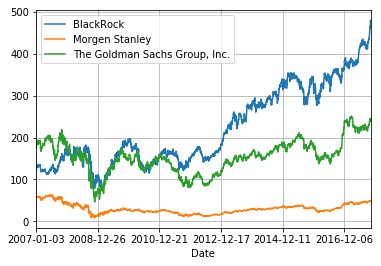

In [50]:

morgenStanley = df_stock[df_stock['ticker'] == 'MS']
goldmanSachs = df_stock[df_stock['ticker'] == 'GS']
blackrock =  df_stock[df_stock['ticker'] == 'BLK']



#apple.join(tesco.set_index('Date'), on='Date')


stocks = pd.DataFrame({"The Goldman Sachs Group, Inc.": goldmanSachs["Adj Close"], 
                       "Morgen Stanley": morgenStanley["Adj Close"], 
                       "BlackRock": blackrock["Adj Close"]})

stocks.plot(grid = True)

# Dictionary


In [56]:
tickerDic = pd.read_pickle('TickerDic.pickle')

In [57]:
tickerDic

,Ticker,Name,Category Name,RedName
0,AFL,Aflac Incorporated,Accident & Health Insurance,Aflac
1,AIZ,"Assurant, Inc.",Accident & Health Insurance,Assurant
23,UNM,Unum Group,Accident & Health Insurance,Unum
52,IPG,"The Interpublic Group of Companies, Inc.",Advertising Agencies,Interpublic
57,OMC,Omnicom Group Inc.,Advertising Agencies,Omnicom
166,NOC,Northrop Grumman Corporation,Aerospace/Defense - Major Diversified,Northrop Grumman
202,TXT,Textron Inc.,Aerospace/Defense - Major Diversified,Textron
222,BA,The Boeing Company,Aerospace/Defense Products & Services,Boeing
234,GD,General Dynamics Corporation,Aerospace/Defense Products & Services,Dynamics
243,LLL,"L3 Technologies, Inc.",Aerospace/Defense Products & Services,L3


# Stock Rate and Messages in Comparison

In [81]:
reuters = pd.read_csv('MediaAttention.csv')
reuters = reuters.set_index('Time')

GS2008 = goldmanSachs.loc['2008-01-01':'2008-12-31']

In [82]:
reuters.head()

,Aflac_count,Assurant_count,Unum_count,Interpublic_count,Omnicom_count,Northrop_Grumman_count,Textron_count,Boeing_count,Dynamics_count,L3_count,...,Waste_Management_count,Sprint_count,positive_count,negative_count,Morgan_Stanley_positive_count,Morgan_Stanley_negative_count,Goldman_Sachs_positive_count,Goldman_Sachs_negative_count,BlackRock_positive_count,BlackRock_negative_count
Time,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,8,4,0,0,0,0,0,0
2008-01-02,0,0,0,2,0,0,0,3,2,1,...,0,2,220,27,0,0,0,0,0,0
2008-01-03,0,0,0,0,0,2,0,7,2,0,...,2,0,235,43,0,0,0,0,0,0
2008-01-04,0,0,0,0,0,2,0,2,0,0,...,0,0,184,34,0,0,0,0,0,0
2008-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,12,4,0,0,0,0,0,0


## Goldman Sachs 

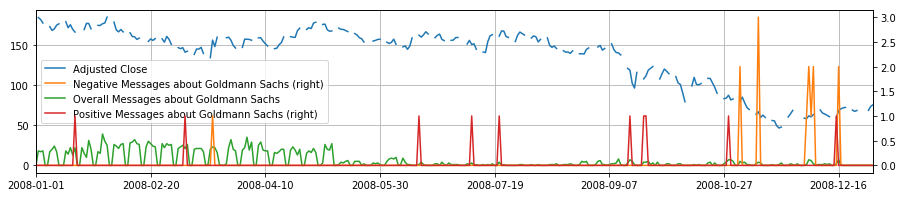

In [85]:
stocks_mediaGS = pd.DataFrame({"Adjusted Close": GS2008["Adj Close"], 
                        "Overall Messages about Goldmann Sachs": reuters["Goldman_Sachs_count"],
                       "Positive Messages about Goldmann Sachs": reuters["Goldman_Sachs_positive_count"],
                       "Negative Messages about Goldmann Sachs": reuters["Goldman_Sachs_negative_count"]})
                    
stocks_mediaGS.plot(grid = True, figsize=(15,3), secondary_y=["Positive Messages about Goldmann Sachs", "Negative Messages about Goldmann Sachs"])      



## Morgan Stanley

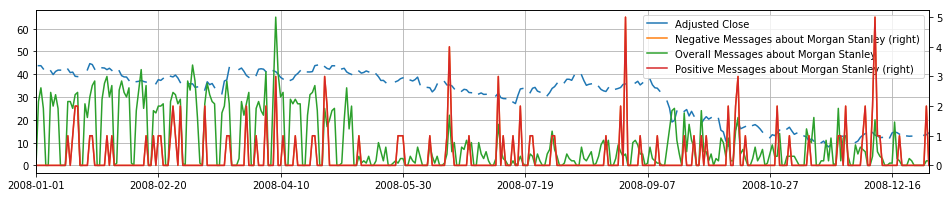

In [91]:
MS2008 = morgenStanley.loc['2008-01-01':'2008-12-31']

stocks_mediaMS = pd.DataFrame({"Adjusted Close": MS2008["Adj Close"], 
                    "Overall Messages about Morgan Stanley": reuters["Morgan_Stanley_count"],
                       "Positive Messages about Morgan Stanley": reuters["Morgan_Stanley_positive_count"],
                       "Negative Messages about Morgan Stanley": reuters["Morgan_Stanley_positive_count"]})
                    
stocks_mediaMS.plot(grid = True, figsize=(16,3), secondary_y=["Positive Messages about Morgan Stanley", "Negative Messages about Morgan Stanley"])      



## Black Rock

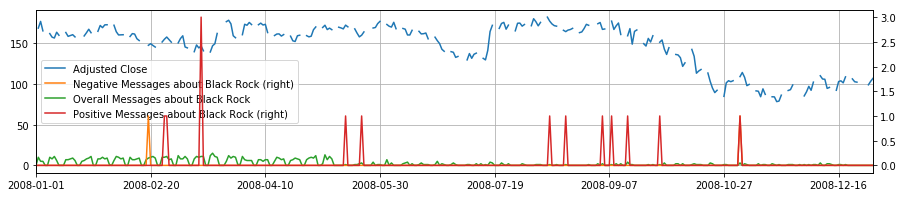

In [92]:
BR2008 = blackrock.loc['2008-01-01':'2008-12-31']

stocks_mediaBR = pd.DataFrame({"Adjusted Close": BR2008["Adj Close"], 
                        "Overall Messages about Black Rock": reuters["BlackRock_count"],
                       "Positive Messages about Black Rock": reuters["BlackRock_positive_count"],
                       "Negative Messages about Black Rock": reuters["BlackRock_negative_count"]})
                    
stocks_mediaBR.plot(grid = True, figsize=(15,3), secondary_y=["Positive Messages about Black Rock", "Negative Messages about Black Rock"])      



# Word Clouds

In [93]:
PATH = ''
df_reu = pd.read_csv(PATH+'reuters_fBL2008.csv.gz', parse_dates=['Time']).set_index('Time')

In [94]:
df_reu.head()

,Short_Msg
Time,
2008-01-02 04:59:53,UPDATE 1-Woodside shuts Karratha gas plant due...
2008-01-02 04:56:29,Bhutan announces results of first vote
2008-01-02 04:54:29,Djokovic reveling in mixed format at Hopman Cup
2008-01-02 04:50:30,S.Korea's C&Heavy says wins $475 mln ship order
2007-12-31 14:36:24,"M/I Homes sells land, exits a Florida market"


In [96]:
messages_list = df_reu['Short_Msg'].tolist()

In [99]:
df_reu[df_reu['Short_Msg'].str.match('BlackRock')] 


,Short_Msg
Time,
2008-01-02 14:52:24,BlackRock Group - Rule 8.3- Xstrata Plc
2008-01-02 14:50:18,BlackRock Group - Rule 8.3- Rio Tinto Plc
2008-01-02 14:48:30,BlackRock Group - Rule 8.3- BHP Billiton Plc
2008-01-02 14:46:36,BlackRock Group - Rule 8.3- BHP Billiton Ltd
2008-01-02 12:31:15,BlackRock Group - Rule 8.3- BHP Billiton Ltd
2008-01-02 07:00:06,BlackRock Group - Rule 8.3- Xstrata Plc
2008-01-02 07:00:06,BlackRock Group - Rule 8.3- Rio Tinto Plc
2008-01-02 07:00:06,BlackRock Group - Rule 8.3- BHP Billiton Ltd
2008-01-02 07:00:03,BlackRock Group - Rule 8.3- BHP Billiton Plc
